# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [31]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [32]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [33]:
cars = pd.read_csv('CarPrice_Assignment.csv')

In [34]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [35]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [36]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [37]:
#checking nan values in cars dataframe
cars.isnull().values.any()

False

In [38]:
#drop duplicated rows
cars = cars.drop_duplicates()

In [39]:
#drop unwanted car_ID column
cars.drop('car_ID', axis=1, inplace=True)

In [40]:
#remove car models from CarName column
cars.CarName = cars.CarName.str.split(' ', expand=True)[0]
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [41]:
#find unique car names
print(cars.CarName.unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


<p>It has been observed that few car names have different speeling and cases though they are from same manufacturer.<p>
    <ul>
        <li>mazda , maxda</li>
        <li>Nissan, nissan</li>
        <li>porsche, porcshce</li>
        <li>toyota, toyouta</li>
        <li>volkswagen, vokswagen, vw</li>
    </ul>
<p><b>So, those above incorrect speelings and cases need to replaced with correct names</b></p>

In [42]:
#correcting car names
car_replacement = {'maxda':'mazda','Nissan':'nissan','porcshce': 'porsche',
               'toyouta':'toyota', 'vw':'volkswagen', 'vokswagen':'volkswagen'}
cars.CarName = cars.CarName.replace(car_replacement)
print(cars.CarName.unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


<h3><b>One-Hot Encoding of Categorical Data

In [43]:
#encoding of categorical data
#find columns with object type
categorical_data = cars.select_dtypes('object').columns
cars_categorical = cars[categorical_data]
cars_categorical = pd.get_dummies(cars_categorical)
pd.set_option('display.max_columns', None)
cars_categorical.head()

,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [44]:
#now concat both numerical and one_hot encoded columns 
cars_numerical_data = cars.select_dtypes(exclude=['object']).columns
cars_numerical = cars[cars_numerical_data]
print(cars_categorical.shape, cars_numerical.shape) 
cars_numerical

(205, 60) (205, 15)


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [45]:
cars_final = pd.concat([cars_numerical,cars_categorical], axis=1)
cars_final.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [46]:
cars_final.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.014634,0.034146,0.039024,0.039024,0.014634,0.043902,0.063415,0.019512,0.014634,0.082927,0.004878,0.063415,0.087805,0.053659,0.034146,0.024390,0.009756,0.029268,0.058537,0.156098,0.058537,0.053659,0.097561,0.902439,0.819512,0.180488,0.560976,0.439024,0.029268,0.039024,0.341463,0.468293,0.121951,0.043902,0.585366,0.370732,0.985366,0.014634,0.058537,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.024390,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.120377,0.182050,0.194127,0.194127,0.120377,0.205380,0.244304,0.138655,0.120377,0.276447,0.069843,0.244304,0.283704,0.225894,0.182050,0.154635,0.098531,0.168970,0.235330,0.363836,0.235330,0.225894,0.297446,0.297446,0.385535,0.385535,0.497483,0.497483,0.168970,0.194127,0.475361,0.500215,0.328031,0.205380,0.493865,0.484183,0.120377,0.120377,0.235330,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.154635,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

In [47]:
#split dependent y and independent X data from cars_final 
y = cars_final['price']
X = cars_final.drop('price', axis=1)
#now split through train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=121)
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.28, random_state=55)
print(f'X_train, y_train length = {len(X_train)}, {len(y_train)}\n\
X_test, y_test length = {len(X_test)}, {len(y_test)}')
print(f'\nTraining % = {round(len(X_train) / len(cars_final) * 100)}')
print(f'Testing % = {round(len(X_test) / len(cars_final) * 100)}')

X_train, y_train length = 143, 143
X_test, y_test length = 62, 62

Training % = 70
Testing % = 30


<h3>Normalize The Data</h3>

In [48]:
#Normalizing independent X data of first 14 cols
print('Before Normalization X data taking sample of last 5 columns\n')
print(f'X_train = {X_train.iloc[:,9:14].head(2)}\n')
print(f'X_test = {X_test.iloc[:,9:14].head(2)}\n')

mean = X_train.iloc[:,:14].mean(axis=0)
mean_denormalize = mean
X_train.iloc[:,:14]-= mean
std = X_train.iloc[:,:14].std(axis=0)
X_train.iloc[:,:14] /= std

X_test.iloc[:,:14] -= mean
X_test.iloc[:,:14] /= std

print('After Normalization the same X data taking sample of last 5 columns\n')
print(f'X_train = {X_train.iloc[:,9:14].head(2)}\n')
print(f'X_test = {X_test.iloc[:,9:14].head(2)}\n')

Before Normalization X data taking sample of last 5 columns

X_train =     compressionratio  horsepower  peakrpm  citympg  highwaympg
48               8.1         176     4750       15          19
49              11.5         262     5000       13          17

X_test =      compressionratio  horsepower  peakrpm  citympg  highwaympg
104               9.0         160     5200       19          25
158              22.5          56     4500       34          36

After Normalization the same X data taking sample of last 5 columns

X_train =     compressionratio  horsepower   peakrpm   citympg  highwaympg
48         -0.503989    1.705934 -0.785471 -1.508768   -1.670193
49          0.366149    3.795326 -0.269758 -1.802711   -1.952007

X_test =      compressionratio  horsepower   peakrpm   citympg  highwaympg
104         -0.273659    1.317210  0.142813 -0.920883   -0.824750
158          3.181302   -1.209496 -1.301185  1.283686    0.725228



In [49]:
#Normalizing dependent y data
print('Before Normalization Y data taking sample of first 3 values\n')
print(f'y_train = {list(y_train.head(3))}')
print(f'y_test = {list(y_test.head(3))}')


mean = y_train.mean(axis=0)
y_train -= mean
std = y_train.std(axis=0)
y_train /= std

y_test -= mean
y_test /= std


print('\nAfter Normalization Y the same data taking sample of first 3 values\n')
print(f'y_train = {list(y_train.head(3))}')
print(f'y_test = {list(y_test.head(3))}')

Before Normalization Y data taking sample of first 3 values

y_train = [35550.0, 36000.0, 12290.0]
y_test = [17199.0, 7898.0, 12170.0]

After Normalization Y the same data taking sample of first 3 values

y_train = [2.6668312910222847, 2.7212798290440974, -0.14755314094962943]
y_test = [0.4464199104927664, -0.6789708720425205, -0.16207275108877944]


In [50]:
#function to denormalize price values 
def denormalize_price(data):
    mean= 13554.454545454546
    std= 8097.543575953677
    return (data*std)+mean


<h3>Building The Model</h3>

In [51]:
from tensorflow.keras import models
from tensorflow.keras import layers
# build model 
def build_compile_model(act, opti):
    from tensorflow.keras import regularizers
    print('*****************************')
    print(f'Activation Function = {act}')
    print(f'Optimizer = {opti}')
    dnn_model = models.Sequential()
    regular_value = 0.001
    dnn_model.add(layers.Dense(64,kernel_regularizer=regularizers.l1_l2(l1=regular_value, l2=regular_value), activation=act,input_shape=(X_train.shape[1],)))
    dnn_model.add(layers.Dropout(0.5))
    dnn_model.add(layers.Dense(64,kernel_regularizer=regularizers.l1_l2(l1=regular_value, l2=regular_value), activation=act))
    dnn_model.add(layers.Dropout(0.5))
    dnn_model.add(layers.Dense(1))
    dnn_model.compile(optimizer=opti, loss='mse', metrics=['mae'])
    return dnn_model

In [52]:
def train_predict_evaluate(dnn_model, batch, epoch):
    
    print(f'Batch size = {batch}')
    print(f'Number of epochs = {epoch}')
    print('*****************************')
    dnn_model.fit(X_train, y_train, batch_size=batch, validation_split=0.2, epochs = epoch, verbose = 0)
    
    #keep track of training history to find best epoch 
    val_mae_per_epoch = dnn_model.history.history['val_mae']
    best_epoch = val_mae_per_epoch.index(min(val_mae_per_epoch)) + 1
    print('Lowest MAE on epoch#: %d' % (best_epoch,))
    print('Check Learning Curve of Train vs Validation Loss to determine underfitting, overfitting and bestfitting')
    plt.plot(dnn_model.history.history['loss'])
    plt.plot(dnn_model.history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train-loss', 'val-loss'], loc='upper left')
    plt.show()
    
    #plot Mean Absolute Error
    plt.plot(dnn_model.history.history['mae'])
    plt.plot(dnn_model.history.history['val_mae'])
    plt.title('model MAE')
    plt.ylabel('mae')
    plt.xlabel('epoch')
    plt.legend(['train-loss', 'val-loss'], loc='upper left')
    plt.show()
    
    # Evaluate model and make data frame of acutal test values and predicted test values
    _ , mae = dnn_model.evaluate(X_test, y_test)
    mae = np.round((mae*100),2)
    print(f'MEAN ABSOLUTE ERROR = {mae}%')
    y_pred = dnn_model.predict(X_test)
    y_new_test = np.array(y_test).flatten().reshape(len(y_test),1)
    dn_pred_price = np.round(denormalize_price(y_pred))
    dn_test_price = denormalize_price(y_new_test)
    price_pred_actual = np.concatenate((dn_pred_price, dn_test_price), axis=1)
    test_prediction = pd.DataFrame(price_pred_actual, columns=['Predicted_Price', 'Actual_Price'])
    diff = np.abs(test_prediction.Actual_Price - test_prediction.Predicted_Price )
    test_prediction['Absolute_Error'] = diff
    
    r2score = (r2_score(test_prediction.Actual_Price, test_prediction.Predicted_Price ))*100
    print(f'r^2 score = {round(r2score,1)}%')
    print('Mean Absolute Error of Denormalized Data =',round(np.mean(test_prediction['Absolute_Error']),2))
    print(test_prediction)

    # print the linear regression and display datapoints
    from sklearn.linear_model import LinearRegression  
    regressor = LinearRegression()  
    regressor.fit(y_new_test, y_pred)
    y_fit = regressor.predict(y_pred)
    reg_intercept = round(regressor.intercept_[0],4)
    reg_coef = round(regressor.coef_.flatten()[0],4)
    reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)
    plt.scatter(y_new_test, y_pred, color='blue', label= 'data')
    plt.plot(y_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
    plt.title('Linear Regression')
    plt.legend()
    plt.xlabel('observed')
    plt.ylabel('predicted')
    plt.show()

*****************************
Activation Function = relu
Optimizer = adam
Batch size = 5
Number of epochs = 150
*****************************
Lowest MAE on epoch#: 147
Check Learning Curve of Train vs Validation Loss to determine underfitting, overfitting and bestfitting


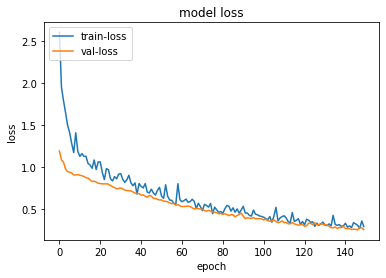

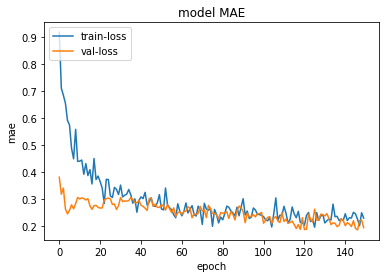

2/2 [==============================] - 0s 1ms/step - loss: 0.2184 - mae: 0.1448
MEAN ABSOLUTE ERROR = 14.48%
r^2 score = 95.2%
Mean Absolute Error of Denormalized Data = 1172.64
    Predicted_Price  Actual_Price  Absolute_Error
0           18966.0  17169.359224     1796.640776
1            8510.0   8056.458322      453.541678
2           14442.0  12242.063381     2199.936619
3            9394.0   8131.901110     1262.098890
4            8808.0   8114.265134      693.734866
..              ...           ...             ...
57          13023.0  16611.866415     3588.866415
58          14415.0  15259.774893      844.774893
59          14885.0  16499.192122     1614.192122
60          16280.0  15749.663126      530.336874
61           9117.0   8114.265134     1002.734866

[62 rows x 3 columns]


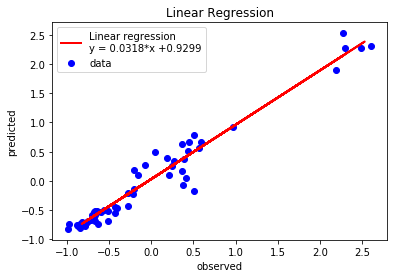

In [54]:
train_predict_evaluate(build_compile_model('relu', 'adam'), 5,150)

*****************************
Activation Function = relu
Optimizer = rmsprop
Batch size = 5
Number of epochs = 150
*****************************
Lowest MAE on epoch#: 104
Check Learning Curve of Train vs Validation Loss to determine underfitting, overfitting and bestfitting


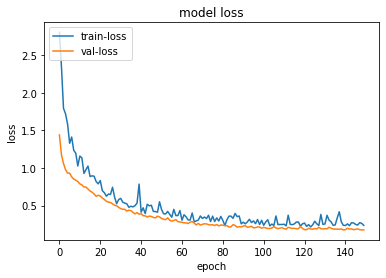

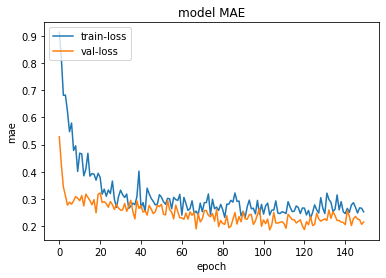

2/2 [==============================] - 0s 1ms/step - loss: 0.1502 - mae: 0.1759
MEAN ABSOLUTE ERROR = 17.59%
r^2 score = 93.6%
Mean Absolute Error of Denormalized Data = 1423.96
    Predicted_Price  Actual_Price  Absolute_Error
0           19237.0  17169.359224     2067.640776
1            8872.0   8056.458322      815.541678
2           14284.0  12242.063381     2041.936619
3            9863.0   8131.901110     1731.098890
4            9167.0   8114.265134     1052.734866
..              ...           ...             ...
57          13624.0  16611.866415     2987.866415
58          14868.0  15259.774893      391.774893
59          15633.0  16499.192122      866.192122
60          17080.0  15749.663126     1330.336874
61           9332.0   8114.265134     1217.734866

[62 rows x 3 columns]


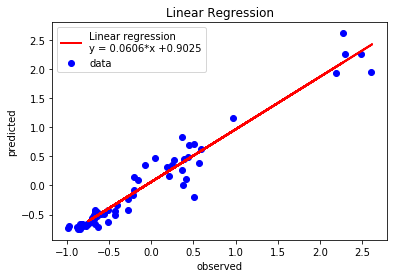

In [58]:
train_predict_evaluate(build_compile_model('relu', 'rmsprop'), 5,150)

*****************************
Activation Function = tanh
Optimizer = adam
Batch size = 5
Number of epochs = 150
*****************************
Lowest MAE on epoch#: 26
Check Learning Curve of Train vs Validation Loss to determine underfitting, overfitting and bestfitting


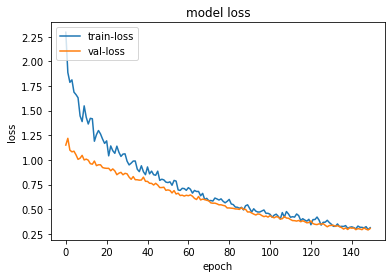

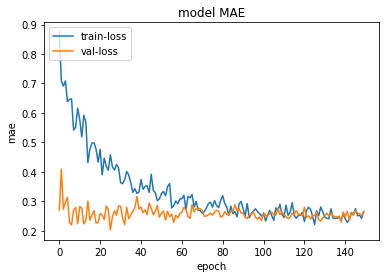

2/2 [==============================] - 0s 2ms/step - loss: 0.2725 - mae: 0.2224
MEAN ABSOLUTE ERROR = 22.24%
r^2 score = 89.0%
Mean Absolute Error of Denormalized Data = 1801.11
    Predicted_Price  Actual_Price  Absolute_Error
0           18746.0  17169.359224     1576.640776
1            5037.0   8056.458322     3019.458322
2           14848.0  12242.063381     2605.936619
3            9669.0   8131.901110     1537.098890
4            7057.0   8114.265134     1057.265134
..              ...           ...             ...
57          13276.0  16611.866415     3335.866415
58          15224.0  15259.774893       35.774893
59          17243.0  16499.192122      743.807878
60          19950.0  15749.663126     4200.336874
61           7481.0   8114.265134      633.265134

[62 rows x 3 columns]


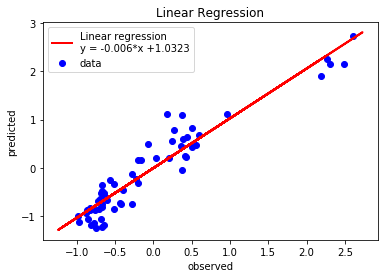

In [59]:
train_predict_evaluate(build_compile_model('tanh', 'adam'), 5,150)

*****************************
Activation Function = tanh
Optimizer = rmsprop
Batch size = 5
Number of epochs = 150
*****************************
Lowest MAE on epoch#: 20
Check Learning Curve of Train vs Validation Loss to determine underfitting, overfitting and bestfitting


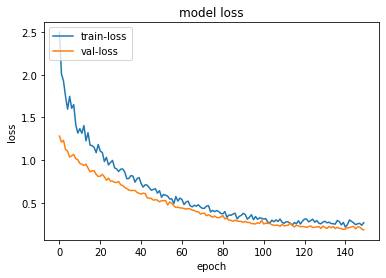

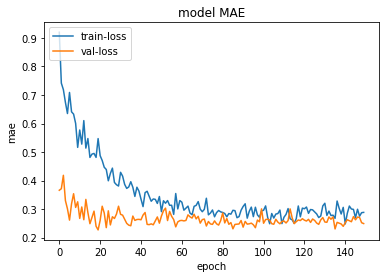

2/2 [==============================] - 0s 1ms/step - loss: 0.1868 - mae: 0.2490
MEAN ABSOLUTE ERROR = 24.9%
r^2 score = 87.8%
Mean Absolute Error of Denormalized Data = 2016.0
    Predicted_Price  Actual_Price  Absolute_Error
0           19048.0  17169.359224     1878.640776
1            8258.0   8056.458322      201.541678
2           15197.0  12242.063381     2954.936619
3           11267.0   8131.901110     3135.098890
4            8883.0   8114.265134      768.734866
..              ...           ...             ...
57          14012.0  16611.866415     2599.866415
58          16418.0  15259.774893     1158.225107
59          17278.0  16499.192122      778.807878
60          18874.0  15749.663126     3124.336874
61           8725.0   8114.265134      610.734866

[62 rows x 3 columns]


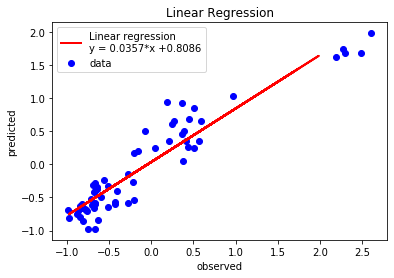

In [60]:
train_predict_evaluate(build_compile_model('tanh', 'rmsprop'), 5,150)